####  This code file is a reproduction of the Adam Optimizer method proposed in the research paper named: <strong>"ADAM: A Method for Stochastic Optimization"</strong> by Diederik P. Kingma and Jimmy Ba.<br> This is a foundational paper in deep learning that introduces the Adam optimizer, widely used for training neural networks.

# Adam Optimizer (from scratch)

In [ ]:
import torch

class AdamOptimizer:
  def __init__(self, params, lr=0.001, betas=(0.9, 0.999), eps=1e-8):
    self.params = list(params)
    self.lr = lr
    self.beta1, self.beta2 = betas
    self.eps = eps
    self.m = [torch.zeros_like(p) for p in self.params]
    self.v = [torch.zeros_like(p) for p in self.params]
    self.t = 0

  def step(self):
    self.t += 1
    for i, param in enumerate(self.params):
      if param.grad is None:
        continue
      grad = param.grad.data

      # update biased first and second moment estimates
      self.m[i] = self.beta1 * self.m[i] + (1 - self.beta1) * grad
      self.v[i] = self.beta2 * self.v[i] + (1 - self.beta2) * grad ** 2

      # bias-corrected moment estimates
      m_hat = self.m[i] / (1 - self.beta1 ** self.t)
      v_hat = self.v[i] / (1 - self.beta2 ** self.t)

      # update params
      param.data -= self.lr * m_hat / (v_hat.sqrt() + self.eps)

  def zero_grad(self):
    for param in self.params:
      if param.grad is not None:
        param.grad.zero_()


Step 001: x = 9.9000, loss = 100.000000
Step 002: x = 9.8000, loss = 98.009995
Step 003: x = 9.7001, loss = 96.040527
Step 004: x = 9.6002, loss = 94.091957
Step 005: x = 9.5005, loss = 92.164604
Step 006: x = 9.4008, loss = 90.258774
Step 007: x = 9.3012, loss = 88.374786
Step 008: x = 9.2018, loss = 86.512939
Step 009: x = 9.1026, loss = 84.673515
Step 010: x = 9.0035, loss = 82.856773
Step 011: x = 8.9046, loss = 81.062943
Step 012: x = 8.8060, loss = 79.292274
Step 013: x = 8.7075, loss = 77.544975
Step 014: x = 8.6094, loss = 75.821243
Step 015: x = 8.5115, loss = 74.121254
Step 016: x = 8.4139, loss = 72.445152
Step 017: x = 8.3166, loss = 70.793091
Step 018: x = 8.2196, loss = 69.165184
Step 019: x = 8.1229, loss = 67.561539
Step 020: x = 8.0267, loss = 65.982231
Step 021: x = 7.9308, loss = 64.427345
Step 022: x = 7.8352, loss = 62.896915
Step 023: x = 7.7401, loss = 61.390968
Step 024: x = 7.6454, loss = 59.909523
Step 025: x = 7.5512, loss = 58.452572
Step 026: x = 7.4573, lo

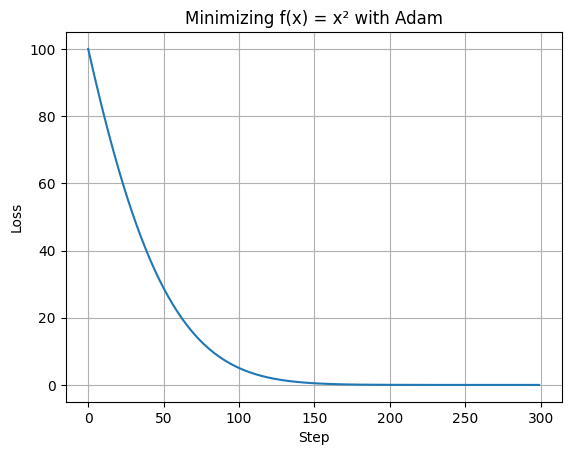

In [ ]:
import matplotlib.pyplot as plt

x = torch.tensor([10.0], requires_grad=True)

# optimizer
optimizer = AdamOptimizer([x], lr=0.1)

losses = []

# training loop
for step in range(300):
  optimizer.zero_grad()
  loss = x ** 2
  loss.backward()
  optimizer.step()

  losses.append(loss.item())
  print(f"Step {step+1:03d}: x = {x.item():.4f}, loss = {loss.item():.6f}")

# plot loss over iterations
plt.plot(losses)
plt.xlabel("Step")
plt.ylabel("Loss")
plt.title("Minimizing f(x) = x² with Adam")
plt.grid(True)
plt.show()

Step 001: loss = 7.154907
Step 011: loss = 0.554376
Step 021: loss = 0.215047
Step 031: loss = 0.172107
Step 041: loss = 0.011819
Step 051: loss = 0.023235
Step 061: loss = 0.002925
Step 071: loss = 0.002233
Step 081: loss = 0.000538
Step 091: loss = 0.000288
Step 100: loss = 0.000103


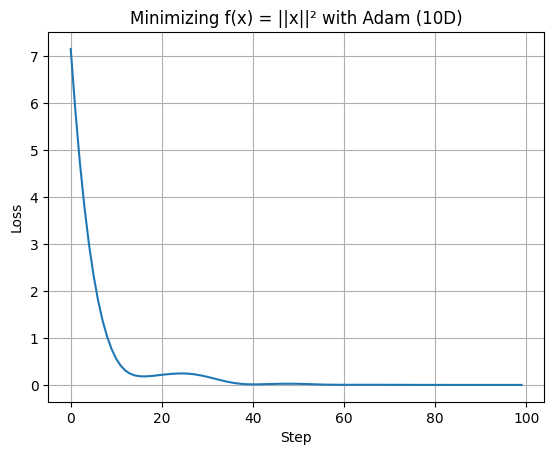

In [ ]:
# 10D tensor
x = torch.randn(10, requires_grad=True)

# initialize optimizer
optimizer = AdamOptimizer([x], lr=0.1)

losses = []

# optimization loop
for step in range(100):
  optimizer.zero_grad()
  loss = torch.sum(x ** 2)  # f(x) = x_1^2 + x_2^2 + ... + x_10^2
  loss.backward()
  optimizer.step()

  losses.append(loss.item())
  if step % 10 == 0 or step == 99:
    print(f"Step {step+1:03d}: loss = {loss.item():.6f}")

# loss curve
plt.plot(losses)
plt.xlabel("Step")
plt.ylabel("Loss")
plt.title("Minimizing f(x) = ||x||² with Adam (10D)")
plt.grid(True)
plt.show()

# Logistic Regression on MNIST

In [ ]:
class LogisticRegressionModel(torch.nn.Module):
  def __init__(self, input_dim=784, num_classes=10):
    super().__init__()
    self.linear = torch.nn.Linear(input_dim, num_classes)

  def forward(self, x):
    return self.linear(x.view(x.size(0), -1))  # reshape

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# MNIST dataset
transform = transforms.Compose([
  transforms.ToTensor(),  # convert to [0,1]
  transforms.Lambda(lambda x: x.view(-1))  # 28x28 to 784
])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset  = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=128, shuffle=True)
test_loader  = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)

100%|██████████| 9.91M/9.91M [00:00<00:00, 39.3MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.18MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 10.5MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.71MB/s]


In [ ]:
# training
def train(model, optimizer, loss_fn, epochs=5, use_custom=False):
  train_losses, test_accs = [], []
  for epoch in range(epochs):
    model.train()
    total_loss = 0
    for x, y in train_loader:
      outputs = model(x)
      loss = loss_fn(outputs, y)

      if use_custom:
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
      else:
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

      total_loss += loss.item()

    train_losses.append(total_loss / len(train_loader))

    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
      for x, y in test_loader:
        outputs = model(x)
        _, predicted = torch.max(outputs.data, 1)
        total += y.size(0)
        correct += (predicted == y).sum().item()
    test_accs.append(correct / total)

    print(f"Epoch {epoch+1}: Loss = {train_losses[-1]:.4f}, Test Accuracy = {100 * test_accs[-1]:.2f}%")

  return train_losses, test_accs

In [ ]:
# Custom Adam
model1 = LogisticRegressionModel()
opt1 = AdamOptimizer(model1.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()
losses1, accs1 = train(model1, opt1, loss_fn, epochs=10, use_custom=True)

Epoch 1: Loss = 0.6651, Test Accuracy = 90.11%
Epoch 2: Loss = 0.3597, Test Accuracy = 91.39%
Epoch 3: Loss = 0.3179, Test Accuracy = 91.74%
Epoch 4: Loss = 0.2987, Test Accuracy = 92.10%
Epoch 5: Loss = 0.2871, Test Accuracy = 92.28%
Epoch 6: Loss = 0.2788, Test Accuracy = 92.37%
Epoch 7: Loss = 0.2730, Test Accuracy = 92.44%
Epoch 8: Loss = 0.2686, Test Accuracy = 92.58%
Epoch 9: Loss = 0.2645, Test Accuracy = 92.20%
Epoch 10: Loss = 0.2620, Test Accuracy = 92.58%


In [ ]:
# PyTorch SGD
model2 = LogisticRegressionModel()
opt2 = torch.optim.SGD(model2.parameters(), lr=0.1)
losses2, accs2 = train(model2, opt2, loss_fn, epochs=10)

Epoch 1: Loss = 0.5739, Test Accuracy = 89.91%
Epoch 2: Loss = 0.3739, Test Accuracy = 90.80%
Epoch 3: Loss = 0.3425, Test Accuracy = 91.39%
Epoch 4: Loss = 0.3260, Test Accuracy = 91.37%
Epoch 5: Loss = 0.3153, Test Accuracy = 91.77%
Epoch 6: Loss = 0.3078, Test Accuracy = 91.77%
Epoch 7: Loss = 0.3021, Test Accuracy = 91.88%
Epoch 8: Loss = 0.2974, Test Accuracy = 91.97%
Epoch 9: Loss = 0.2937, Test Accuracy = 92.15%
Epoch 10: Loss = 0.2903, Test Accuracy = 92.06%


In [ ]:
# PyTorch Adam
model3 = LogisticRegressionModel()
opt3 = torch.optim.Adam(model3.parameters(), lr=0.001)
losses3, accs3 = train(model3, opt3, loss_fn, epochs=10)

Epoch 1: Loss = 0.6635, Test Accuracy = 90.15%
Epoch 2: Loss = 0.3594, Test Accuracy = 91.44%
Epoch 3: Loss = 0.3180, Test Accuracy = 91.73%
Epoch 4: Loss = 0.2985, Test Accuracy = 91.99%
Epoch 5: Loss = 0.2869, Test Accuracy = 92.31%
Epoch 6: Loss = 0.2788, Test Accuracy = 92.33%
Epoch 7: Loss = 0.2733, Test Accuracy = 92.47%
Epoch 8: Loss = 0.2684, Test Accuracy = 92.44%
Epoch 9: Loss = 0.2650, Test Accuracy = 92.55%
Epoch 10: Loss = 0.2620, Test Accuracy = 92.58%


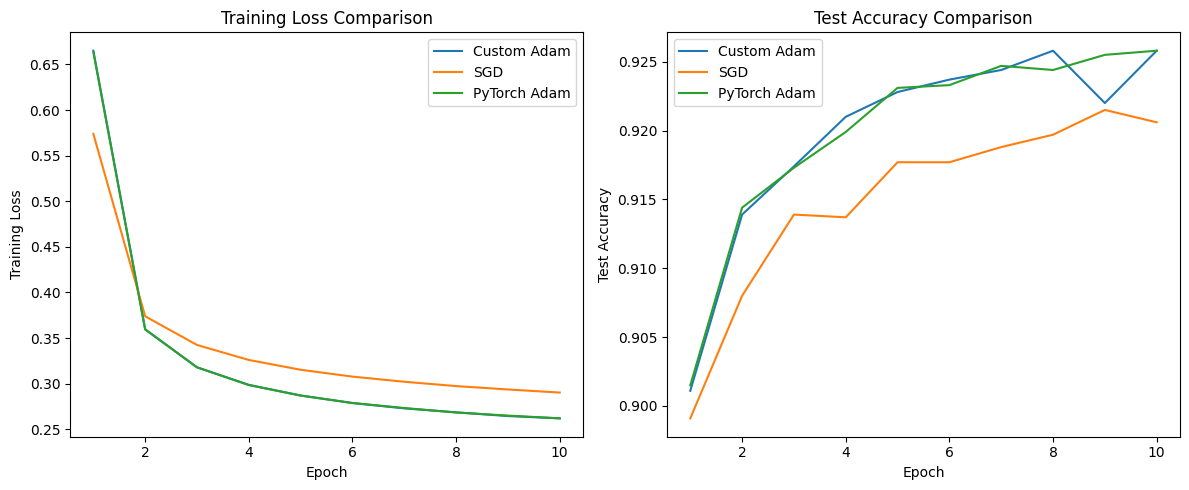

In [ ]:
epochs = range(1, 11)

plt.figure(figsize=(12, 5))

# loss
plt.subplot(1, 2, 1)
plt.plot(epochs, losses1, label='Custom Adam')
plt.plot(epochs, losses2, label='SGD')
plt.plot(epochs, losses3, label='PyTorch Adam')
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.legend()
plt.title("Training Loss Comparison")

# accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accs1, label='Custom Adam')
plt.plot(epochs, accs2, label='SGD')
plt.plot(epochs, accs3, label='PyTorch Adam')
plt.xlabel("Epoch")
plt.ylabel("Test Accuracy")
plt.legend()
plt.title("Test Accuracy Comparison")

plt.tight_layout()
plt.show()

# Feedforward neural networks on MNIST

In [ ]:
# feedforward neural network
class FeedforwardNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.net = nn.Sequential(
      nn.Linear(784, 256),
      nn.ReLU(),
      nn.Linear(256, 128),
      nn.ReLU(),
      nn.Linear(128, 10)
    )

  def forward(self, x):
    return self.net(x)

In [ ]:
# custom Adam
model1 = FeedforwardNN()
opt1 = AdamOptimizer(model1.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()
losses1, accs1 = train(model1, opt1, loss_fn, epochs=10, use_custom=True)

Epoch 1: Loss = 0.3526, Test Accuracy = 94.73%
Epoch 2: Loss = 0.1362, Test Accuracy = 96.83%
Epoch 3: Loss = 0.0882, Test Accuracy = 97.45%
Epoch 4: Loss = 0.0629, Test Accuracy = 97.48%
Epoch 5: Loss = 0.0489, Test Accuracy = 97.73%
Epoch 6: Loss = 0.0368, Test Accuracy = 97.80%
Epoch 7: Loss = 0.0292, Test Accuracy = 97.75%
Epoch 8: Loss = 0.0224, Test Accuracy = 97.94%
Epoch 9: Loss = 0.0165, Test Accuracy = 98.07%
Epoch 10: Loss = 0.0162, Test Accuracy = 97.74%


In [ ]:
# pytorch SGD
model2 = FeedforwardNN()
opt2 = torch.optim.SGD(model2.parameters(), lr=0.1)
losses2, accs2 = train(model2, opt2, loss_fn, epochs=10)

Epoch 1: Loss = 0.6987, Test Accuracy = 91.05%
Epoch 2: Loss = 0.2711, Test Accuracy = 93.40%
Epoch 3: Loss = 0.2008, Test Accuracy = 94.90%
Epoch 4: Loss = 0.1565, Test Accuracy = 95.90%
Epoch 5: Loss = 0.1268, Test Accuracy = 96.18%
Epoch 6: Loss = 0.1060, Test Accuracy = 96.78%
Epoch 7: Loss = 0.0902, Test Accuracy = 96.48%
Epoch 8: Loss = 0.0781, Test Accuracy = 96.89%
Epoch 9: Loss = 0.0678, Test Accuracy = 97.39%
Epoch 10: Loss = 0.0602, Test Accuracy = 97.68%


In [ ]:
# pytorch Adam
model3 = FeedforwardNN()
opt3 = torch.optim.Adam(model3.parameters(), lr=0.001)
losses3, accs3 = train(model3, opt3, loss_fn, epochs=10)

Epoch 1: Loss = 0.3424, Test Accuracy = 95.01%
Epoch 2: Loss = 0.1297, Test Accuracy = 96.41%
Epoch 3: Loss = 0.0862, Test Accuracy = 97.48%
Epoch 4: Loss = 0.0619, Test Accuracy = 97.57%
Epoch 5: Loss = 0.0454, Test Accuracy = 97.79%
Epoch 6: Loss = 0.0359, Test Accuracy = 97.93%
Epoch 7: Loss = 0.0292, Test Accuracy = 97.91%
Epoch 8: Loss = 0.0237, Test Accuracy = 97.52%
Epoch 9: Loss = 0.0172, Test Accuracy = 97.95%
Epoch 10: Loss = 0.0145, Test Accuracy = 98.04%


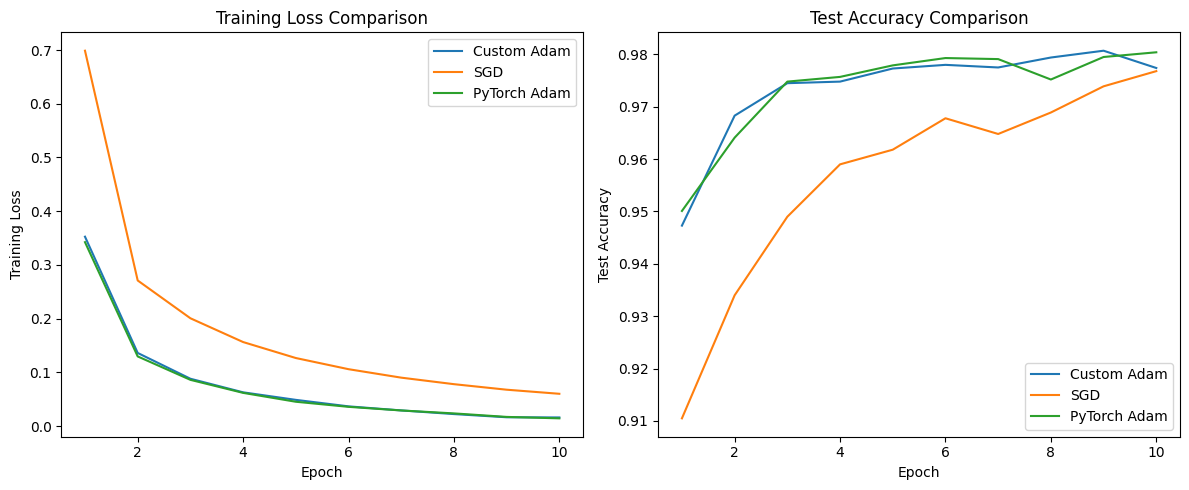

In [ ]:
epochs = range(1, 11)

plt.figure(figsize=(12, 5))

# loss
plt.subplot(1, 2, 1)
plt.plot(epochs, losses1, label='Custom Adam')
plt.plot(epochs, losses2, label='SGD')
plt.plot(epochs, losses3, label='PyTorch Adam')
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.legend()
plt.title("Training Loss Comparison")

# accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accs1, label='Custom Adam')
plt.plot(epochs, accs2, label='SGD')
plt.plot(epochs, accs3, label='PyTorch Adam')
plt.xlabel("Epoch")
plt.ylabel("Test Accuracy")
plt.legend()
plt.title("Test Accuracy Comparison")

plt.tight_layout()
plt.show()

# Autoencoders on MNIST

Encoder:
784 → 128 → 64 → 32

Decoder:
32 → 64 → 128 → 784

In [ ]:
class Autoencoder(nn.Module):
  def __init__(self):
    super().__init__()
    self.encoder = nn.Sequential(
      nn.Linear(784, 128),
      nn.ReLU(),
      nn.Linear(128, 64),
      nn.ReLU(),
      nn.Linear(64, 32),
      nn.ReLU()
    )
    self.decoder = nn.Sequential(
      nn.Linear(32, 64),
      nn.ReLU(),
      nn.Linear(64, 128),
      nn.ReLU(),
      nn.Linear(128, 784),
      nn.Sigmoid()  # output range [0,1]
    )

  def forward(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [ ]:
loss_fn = nn.MSELoss()
model1 = Autoencoder()
opt1 = AdamOptimizer(model1.parameters(), lr=0.001)
losses1 = []

for epoch in range(10):
  model1.train()
  epoch_loss = 0
  for x, _ in train_loader:
    out = model1(x)
    loss = loss_fn(out, x)
    opt1.zero_grad()
    loss.backward()
    opt1.step()
    epoch_loss += loss.item()
  losses1.append(epoch_loss / len(train_loader))
  print(f"Epoch {epoch+1}: Loss = {losses1[-1]:.4f}")

Epoch 1: Loss = 0.0641
Epoch 2: Loss = 0.0338
Epoch 3: Loss = 0.0270
Epoch 4: Loss = 0.0236
Epoch 5: Loss = 0.0214
Epoch 6: Loss = 0.0198
Epoch 7: Loss = 0.0182
Epoch 8: Loss = 0.0170
Epoch 9: Loss = 0.0162
Epoch 10: Loss = 0.0156


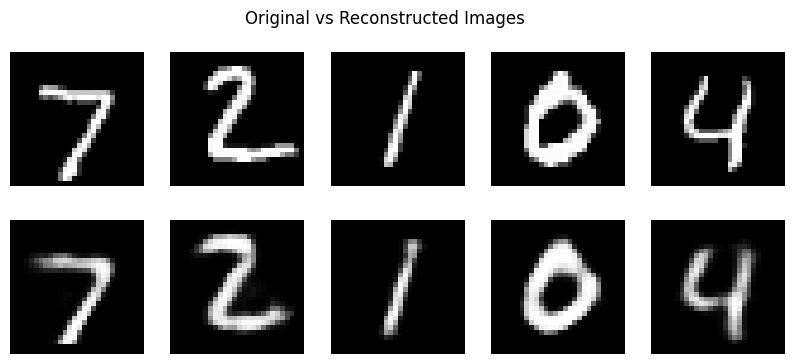

In [ ]:
import matplotlib.pyplot as plt

model1.eval()
with torch.no_grad():
  for x, _ in test_loader:
    out = model1(x)
    break


n = 5
plt.figure(figsize=(10, 4))
for i in range(n):
  # original
  plt.subplot(2, n, i+1)
  plt.imshow(x[i].view(28, 28), cmap="gray")
  plt.axis("off")
  # reconstruction
  plt.subplot(2, n, i+1+n)
  plt.imshow(out[i].view(28, 28), cmap="gray")
  plt.axis("off")
plt.suptitle("Original vs Reconstructed Images")
plt.show()


In [ ]:
loss_fn = nn.MSELoss()
epochs = 10

In [ ]:
import time

In [ ]:
# custom Adam
model1 = Autoencoder()
opt1 = AdamOptimizer(model1.parameters(), lr=0.001)
losses1 = []

start = time.time()
for epoch in range(epochs):
  model1.train()
  epoch_loss = 0
  for x, _ in train_loader:
    out = model1(x)
    loss = loss_fn(out, x)
    opt1.zero_grad()
    loss.backward()
    opt1.step()
    epoch_loss += loss.item()
  losses1.append(epoch_loss / len(train_loader))
  print(f"[Custom Adam] Epoch {epoch+1}: Loss = {losses1[-1]:.4f}")
end = time.time()
time1 = end - start

[Custom Adam] Epoch 1: Loss = 0.0618
[Custom Adam] Epoch 2: Loss = 0.0326
[Custom Adam] Epoch 3: Loss = 0.0264
[Custom Adam] Epoch 4: Loss = 0.0231
[Custom Adam] Epoch 5: Loss = 0.0207
[Custom Adam] Epoch 6: Loss = 0.0187
[Custom Adam] Epoch 7: Loss = 0.0174
[Custom Adam] Epoch 8: Loss = 0.0165
[Custom Adam] Epoch 9: Loss = 0.0158
[Custom Adam] Epoch 10: Loss = 0.0151


In [ ]:
# pytorch SGD
model2 = Autoencoder()
opt2 = torch.optim.SGD(model2.parameters(), lr=0.1)
losses2 = []

start = time.time()
for epoch in range(epochs):
  model2.train()
  epoch_loss = 0
  for x, _ in train_loader:
    out = model2(x)
    loss = loss_fn(out, x)
    opt2.zero_grad()
    loss.backward()
    opt2.step()
    epoch_loss += loss.item()
  losses2.append(epoch_loss / len(train_loader))
  print(f"[SGD] Epoch {epoch+1}: Loss = {losses2[-1]:.4f}")
end = time.time()
time2 = end - start

[SGD] Epoch 1: Loss = 0.2303
[SGD] Epoch 2: Loss = 0.2259
[SGD] Epoch 3: Loss = 0.2195
[SGD] Epoch 4: Loss = 0.2044
[SGD] Epoch 5: Loss = 0.1100
[SGD] Epoch 6: Loss = 0.0711
[SGD] Epoch 7: Loss = 0.0698
[SGD] Epoch 8: Loss = 0.0691
[SGD] Epoch 9: Loss = 0.0686
[SGD] Epoch 10: Loss = 0.0682


In [ ]:
# pytorch Adam
model3 = Autoencoder()
opt3 = torch.optim.Adam(model3.parameters(), lr=0.001)
losses3 = []

start = time.time()
for epoch in range(epochs):
  model3.train()
  epoch_loss = 0
  for x, _ in train_loader:
    out = model3(x)
    loss = loss_fn(out, x)
    opt3.zero_grad()
    loss.backward()
    opt3.step()
    epoch_loss += loss.item()
  losses3.append(epoch_loss / len(train_loader))
  print(f"[PyTorch Adam] Epoch {epoch+1}: Loss = {losses3[-1]:.4f}")
end = time.time()
time3 = end - start

[PyTorch Adam] Epoch 1: Loss = 0.0631
[PyTorch Adam] Epoch 2: Loss = 0.0336
[PyTorch Adam] Epoch 3: Loss = 0.0267
[PyTorch Adam] Epoch 4: Loss = 0.0231
[PyTorch Adam] Epoch 5: Loss = 0.0208
[PyTorch Adam] Epoch 6: Loss = 0.0190
[PyTorch Adam] Epoch 7: Loss = 0.0177
[PyTorch Adam] Epoch 8: Loss = 0.0169
[PyTorch Adam] Epoch 9: Loss = 0.0163
[PyTorch Adam] Epoch 10: Loss = 0.0157


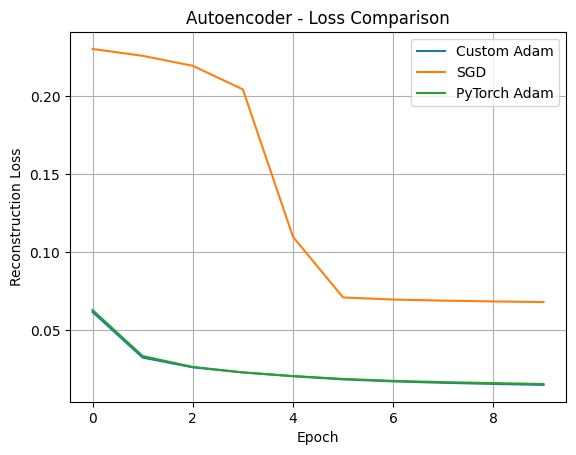

In [ ]:
plt.plot(losses1, label="Custom Adam")
plt.plot(losses2, label="SGD")
plt.plot(losses3, label="PyTorch Adam")
plt.xlabel("Epoch")
plt.ylabel("Reconstruction Loss")
plt.title("Autoencoder - Loss Comparison")
plt.legend()
plt.grid(True)
plt.show()

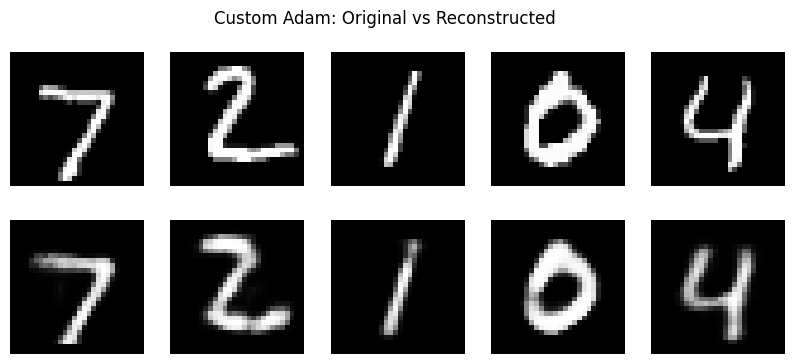

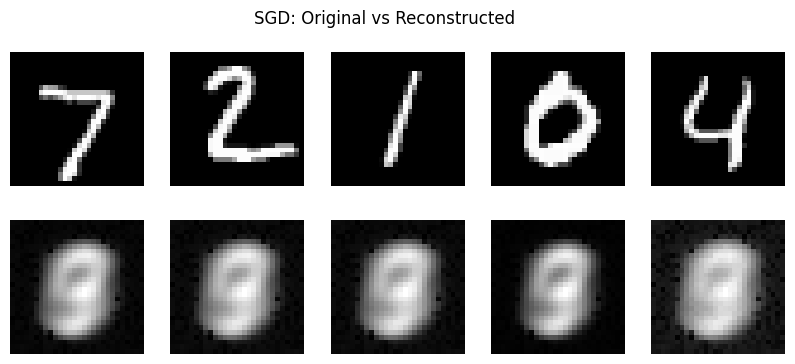

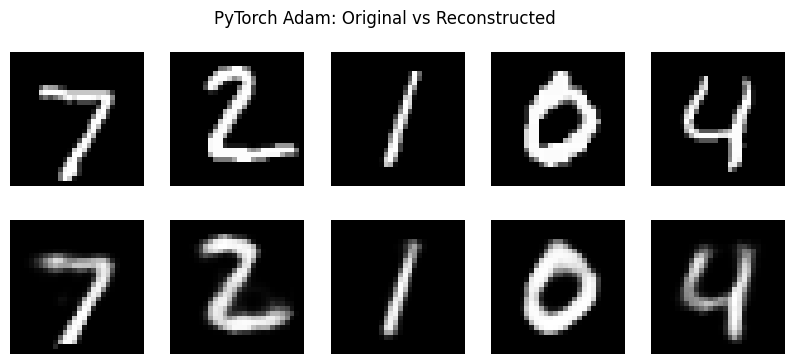

In [ ]:
def visualize(model, title):
  model.eval()
  with torch.no_grad():
    for x, _ in test_loader:
      out = model(x)
      break
  n = 5
  plt.figure(figsize=(10, 4))
  for i in range(n):
    plt.subplot(2, n, i+1)
    plt.imshow(x[i].view(28, 28), cmap="gray")
    plt.axis("off")
    plt.subplot(2, n, i+1+n)
    plt.imshow(out[i].view(28, 28), cmap="gray")
    plt.axis("off")
  plt.suptitle(title)
  plt.show()

visualize(model1, "Custom Adam: Original vs Reconstructed")
visualize(model2, "SGD: Original vs Reconstructed")
visualize(model3, "PyTorch Adam: Original vs Reconstructed")

In [ ]:
print(f"Training Time (s):")
print(f"Custom Adam   : {time1:.2f}")
print(f"SGD           : {time2:.2f}")
print(f"PyTorch Adam  : {time3:.2f}")

Training Time (s):
Custom Adam   : 142.44
SGD           : 110.45
PyTorch Adam  : 126.34


# Autoencoders on CIFAR-10

Encoder: Conv → ReLU → MaxPool (x2)<br>
Decoder: Upsample → ConvTranspose → ReLU (x2) → Sigmoid

In [ ]:
class ConvAutoencoder(nn.Module):
  def __init__(self):
    super().__init__()
    self.encoder = nn.Sequential(
      nn.Conv2d(3, 16, 3, padding=1),
      nn.ReLU(),
      nn.MaxPool2d(2, 2),  # 32x32 to 16x16
      nn.Conv2d(16, 8, 3, padding=1),
      nn.ReLU(),
      nn.MaxPool2d(2, 2),  # 16x16 to 8x8
    )
    self.decoder = nn.Sequential(
      nn.ConvTranspose2d(8, 16, 2, stride=2),  # 8x8 to 16x16
      nn.ReLU(),
      nn.ConvTranspose2d(16, 3, 2, stride=2),  # 16x16 to 32x32
      nn.Sigmoid()
    )

  def forward(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [ ]:
from torchvision import datasets, transforms

In [ ]:
transform = transforms.Compose([
  transforms.ToTensor(),
])

train_loader = torch.utils.data.DataLoader(
  datasets.CIFAR10(root='./data', train=True, transform=transform, download=True),
  batch_size=128, shuffle=True
)

test_loader = torch.utils.data.DataLoader(
  datasets.CIFAR10(root='./data', train=False, transform=transform, download=True),
  batch_size=128, shuffle=False
)

100%|██████████| 170M/170M [00:03<00:00, 49.4MB/s]


In [ ]:
model1 = ConvAutoencoder()
optimizer1 = AdamOptimizer(model1.parameters(), lr=0.001)
model2 = ConvAutoencoder()
optimizer2 = torch.optim.SGD(model2.parameters(), lr=0.1)
model3 = ConvAutoencoder()
optimizer3 = torch.optim.Adam(model3.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

In [ ]:
for epoch in range(10):
  model1.train()
  running_loss = 0
  for imgs, _ in train_loader:
    out = model1(imgs)
    loss = loss_fn(out, imgs)
    optimizer1.zero_grad()
    loss.backward()
    optimizer1.step()
    running_loss += loss.item()
  print(f"Epoch {epoch+1}: Loss = {running_loss / len(train_loader):.4f}")

Epoch 1: Loss = 0.0257
Epoch 2: Loss = 0.0105
Epoch 3: Loss = 0.0088
Epoch 4: Loss = 0.0079
Epoch 5: Loss = 0.0075
Epoch 6: Loss = 0.0072
Epoch 7: Loss = 0.0070
Epoch 8: Loss = 0.0068
Epoch 9: Loss = 0.0067
Epoch 10: Loss = 0.0066


In [ ]:
for epoch in range(10):
  model2.train()
  running_loss = 0
  for imgs, _ in train_loader:
    out = model2(imgs)
    loss = loss_fn(out, imgs)
    optimizer2.zero_grad()
    loss.backward()
    optimizer2.step()
    running_loss += loss.item()
  print(f"Epoch {epoch+1}: Loss = {running_loss / len(train_loader):.4f}")

Epoch 1: Loss = 0.0638
Epoch 2: Loss = 0.0630
Epoch 3: Loss = 0.0629
Epoch 4: Loss = 0.0629
Epoch 5: Loss = 0.0629
Epoch 6: Loss = 0.0629
Epoch 7: Loss = 0.0629
Epoch 8: Loss = 0.0629
Epoch 9: Loss = 0.0628
Epoch 10: Loss = 0.0628


In [ ]:
for epoch in range(10):
  model3.train()
  running_loss = 0
  for imgs, _ in train_loader:
    out = model3(imgs)
    loss = loss_fn(out, imgs)
    optimizer3.zero_grad()
    loss.backward()
    optimizer3.step()
    running_loss += loss.item()
  print(f"Epoch {epoch+1}: Loss = {running_loss / len(train_loader):.4f}")

Epoch 1: Loss = 0.0256
Epoch 2: Loss = 0.0128
Epoch 3: Loss = 0.0094
Epoch 4: Loss = 0.0082
Epoch 5: Loss = 0.0077
Epoch 6: Loss = 0.0075
Epoch 7: Loss = 0.0073
Epoch 8: Loss = 0.0072
Epoch 9: Loss = 0.0070
Epoch 10: Loss = 0.0068


In [ ]:
def show_cifar_recons(model, title):
  model.eval()
  with torch.no_grad():
    for imgs, _ in test_loader:
      recon = model(imgs)
      break

  n = 5
  plt.figure(figsize=(10, 4))
  for i in range(n):
    plt.subplot(2, n, i+1)
    plt.imshow(imgs[i].permute(1, 2, 0))
    plt.axis("off")
    plt.subplot(2, n, i+1+n)
    plt.imshow(recon[i].permute(1, 2, 0))
    plt.axis("off")
  plt.suptitle(title)
  plt.show()

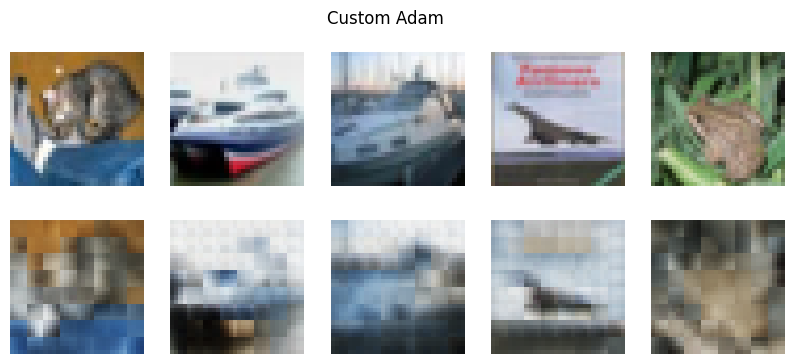

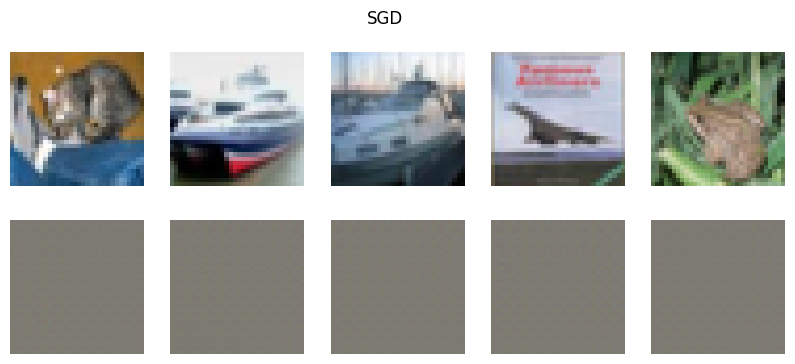

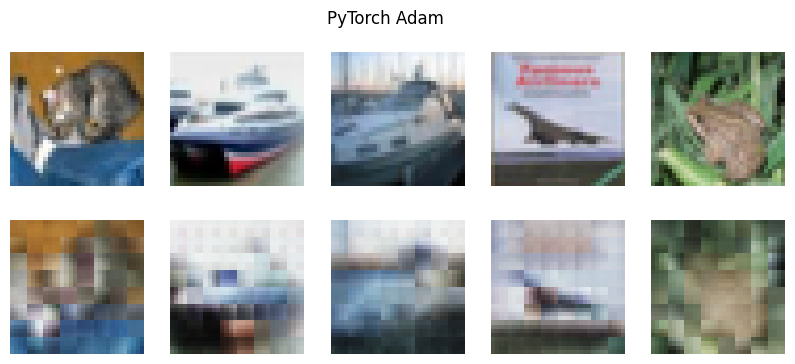

In [ ]:
show_cifar_recons(model1, "Custom Adam")
show_cifar_recons(model2, "SGD")
show_cifar_recons(model3, "PyTorch Adam")

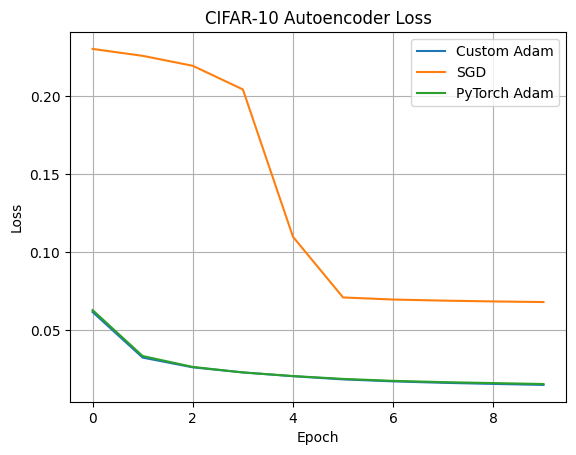

In [ ]:
plt.plot(losses1, label="Custom Adam")
plt.plot(losses2, label="SGD")
plt.plot(losses3, label="PyTorch Adam")
plt.title("CIFAR-10 Autoencoder Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# CNN on CIFAR-10 with Different Optimizers

In [ ]:
class CIFAR10_CNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv_layers = nn.Sequential(
      nn.Conv2d(3, 32, 3, padding=1),
      nn.ReLU(),
      nn.MaxPool2d(2, 2),
      nn.Conv2d(32, 64, 3, padding=1),
      nn.ReLU(),
      nn.MaxPool2d(2, 2),
    )
    self.fc_layers = nn.Sequential(
      nn.Flatten(),
      nn.Linear(64 * 8 * 8, 512),
      nn.ReLU(),
      nn.Linear(512, 10)
    )

  def forward(self, x):
    x = self.conv_layers(x)
    x = self.fc_layers(x)
    return x

In [ ]:
from torchvision import datasets, transforms

transform = transforms.Compose([
  transforms.ToTensor(),
  transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_loader = torch.utils.data.DataLoader(
  datasets.CIFAR10(root='./data', train=True, transform=transform, download=True),
  batch_size=128, shuffle=True
)

test_loader = torch.utils.data.DataLoader(
  datasets.CIFAR10(root='./data', train=False, transform=transform, download=False),
  batch_size=128, shuffle=False
)

100%|██████████| 170M/170M [00:02<00:00, 77.5MB/s]


In [ ]:
def train(model, optimizer, loss_fn, train_loader):
  model.train()
  total_loss = 0
  for x, y in train_loader:
    optimizer.zero_grad()
    out = model(x)
    loss = loss_fn(out, y)
    loss.backward()
    optimizer.step()
    total_loss += loss.item()
  return total_loss / len(train_loader)

def evaluate(model, test_loader):
  model.eval()
  correct = 0
  total = 0
  with torch.no_grad():
    for x, y in test_loader:
      outputs = model(x)
      _, predicted = torch.max(outputs.data, 1)
      total += y.size(0)
      correct += (predicted == y).sum().item()
  return 100 * correct / total

In [ ]:
# compare optimizers
optimizers = {
  'CustomAdam': lambda params: AdamOptimizer(params, lr=0.001),
  'TorchAdam': lambda params: torch.optim.Adam(params, lr=0.001),
  'SGD+Momentum': lambda params: torch.optim.SGD(params, lr=0.01, momentum=0.9),
  'RMSprop': lambda params: torch.optim.RMSprop(params, lr=0.001)
}

num_epochs = 10
results = {}

for name, opt_fn in optimizers.items():
  print(f"\nTraining with {name}...")
  model = CIFAR10_CNN()
  optimizer = opt_fn(model.parameters())
  loss_fn = nn.CrossEntropyLoss()
  train_losses, test_accuracies = [], []

  for epoch in range(num_epochs):
    train_loss = train(model, optimizer, loss_fn, train_loader)
    acc = evaluate(model, test_loader)
    train_losses.append(train_loss)
    test_accuracies.append(acc)
    print(f"Epoch {epoch+1}: Loss = {train_loss:.4f}, Test Acc = {acc:.2f}%")

  results[name] = {'loss': train_losses, 'acc': test_accuracies}


Training with CustomAdam...
Epoch 1: Loss = 1.3344, Test Acc = 60.49%
Epoch 2: Loss = 0.9482, Test Acc = 67.67%
Epoch 3: Loss = 0.7849, Test Acc = 69.92%
Epoch 4: Loss = 0.6441, Test Acc = 71.72%
Epoch 5: Loss = 0.5110, Test Acc = 73.13%
Epoch 6: Loss = 0.3824, Test Acc = 73.34%
Epoch 7: Loss = 0.2677, Test Acc = 72.63%
Epoch 8: Loss = 0.1727, Test Acc = 72.77%
Epoch 9: Loss = 0.1025, Test Acc = 73.61%
Epoch 10: Loss = 0.0676, Test Acc = 73.72%

Training with TorchAdam...
Epoch 1: Loss = 1.3572, Test Acc = 59.93%
Epoch 2: Loss = 0.9754, Test Acc = 67.84%
Epoch 3: Loss = 0.8006, Test Acc = 69.93%
Epoch 4: Loss = 0.6567, Test Acc = 71.84%
Epoch 5: Loss = 0.5266, Test Acc = 72.22%
Epoch 6: Loss = 0.4050, Test Acc = 73.68%
Epoch 7: Loss = 0.2865, Test Acc = 73.90%
Epoch 8: Loss = 0.1917, Test Acc = 72.90%
Epoch 9: Loss = 0.1207, Test Acc = 73.48%
Epoch 10: Loss = 0.0831, Test Acc = 73.29%

Training with SGD+Momentum...
Epoch 1: Loss = 1.6826, Test Acc = 51.35%
Epoch 2: Loss = 1.2387, Test

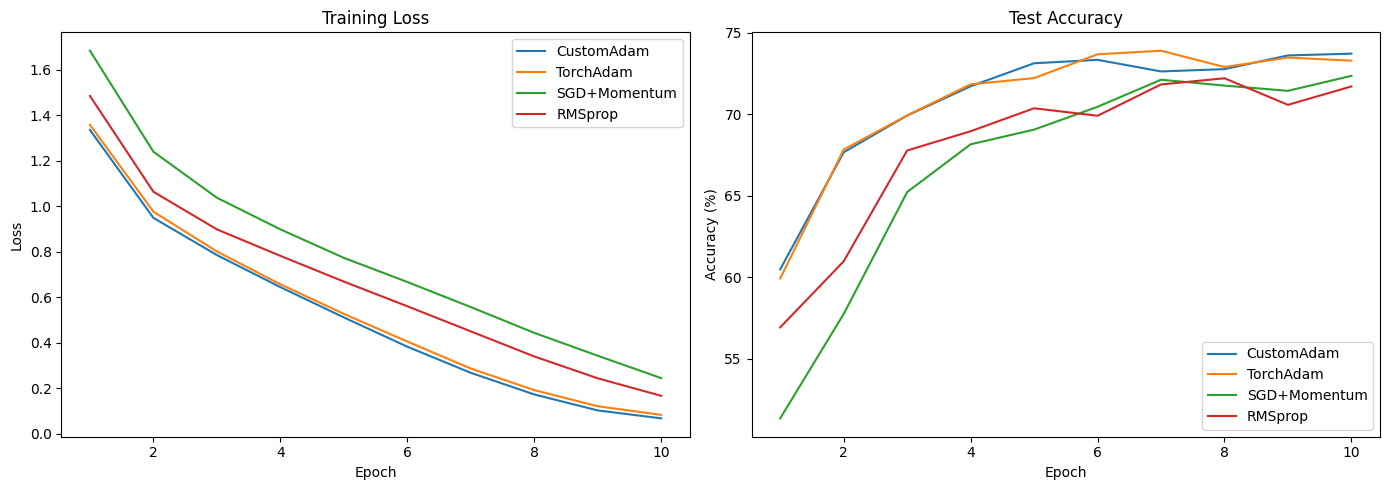

In [ ]:
epochs = list(range(1, num_epochs + 1))

plt.figure(figsize=(14, 5))

# loss
plt.subplot(1, 2, 1)
for name in results:
  plt.plot(epochs, results[name]['loss'], label=name)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# accuracy
plt.subplot(1, 2, 2)
for name in results:
  plt.plot(epochs, results[name]['acc'], label=name)
plt.title("Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()

plt.tight_layout()
plt.show()

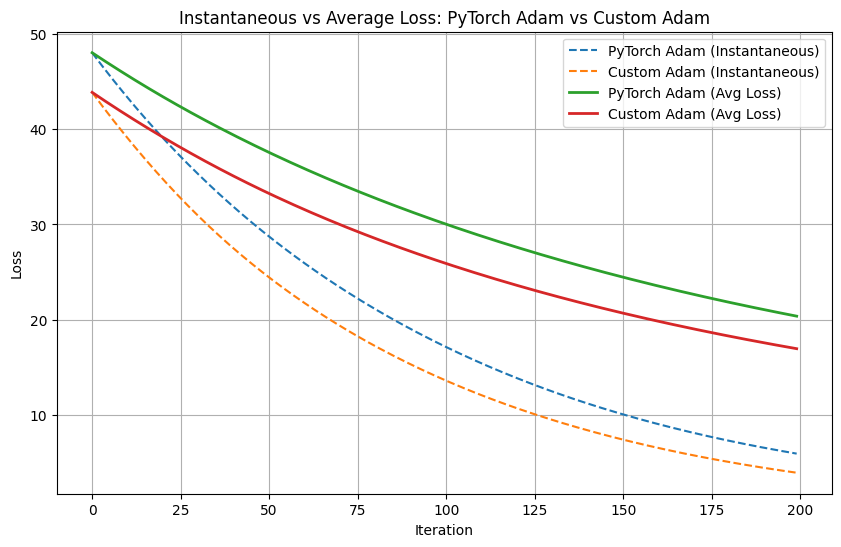

In [ ]:
# synthetic data
torch.manual_seed(42)
n_samples, n_features = 100, 20
A = torch.randn(n_samples, n_features)
x_true = torch.randn(n_features, 1)
b = A @ x_true + 0.1 * torch.randn(n_samples, 1)

loss_fn = torch.nn.MSELoss()
T = 200

# pytorch Adam
x1 = torch.randn(n_features, 1, requires_grad=True)
opt1 = torch.optim.Adam([x1], lr=0.01)

losses1, avg_losses1 = [], []
cumulative1 = 0

for t in range(1, T+1):
  opt1.zero_grad()
  loss = loss_fn(A @ x1, b)
  loss.backward()
  opt1.step()
  l = loss.item()
  cumulative1 += l
  losses1.append(l)
  avg_losses1.append(cumulative1 / t)

# custom Adam
x2 = torch.randn(n_features, 1, requires_grad=True)
opt2 = AdamOptimizer([x2], lr=0.01)

losses2, avg_losses2 = [], []
cumulative2 = 0

for t in range(1, T+1):
  opt2.zero_grad()
  loss = loss_fn(A @ x2, b)
  loss.backward()
  opt2.step()
  l = loss.item()
  cumulative2 += l
  losses2.append(l)
  avg_losses2.append(cumulative2 / t)

# comparison
plt.figure(figsize=(10, 6))

# instantaneous loss
plt.plot(losses1, label="PyTorch Adam (Instantaneous)", linestyle='--')
plt.plot(losses2, label="Custom Adam (Instantaneous)", linestyle='--')

# average loss
plt.plot(avg_losses1, label="PyTorch Adam (Avg Loss)", linewidth=2)
plt.plot(avg_losses2, label="Custom Adam (Avg Loss)", linewidth=2)

plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Instantaneous vs Average Loss: PyTorch Adam vs Custom Adam")
plt.legend()
plt.grid(True)
plt.show()